In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import datetime
import numpy as np

In [55]:
def wrangle():
    #first to get work days:
    df=pd.read_csv("Checkmarks.csv",names=["date","amount"],index_col="date")
    #scale data to actual hours
    df["amount"] = df["amount"] /1000
    #convert index to datetime
    df.index=pd.to_datetime(df.index)
    #limit data to relevant dates
    df=df[df.index >'2022-10-1']
    
    #Rest days
    df2=pd.read_csv("Checkmarks_v.csv")
    df_restdays=df2[df2["مذاكرة"].str.contains("-")]
    df_restdays.drop(columns=["Date","مذاكرة","Unnamed: 2"],inplace=True)
    df_restdays["amount"]=0
    df_restdays.index=pd.to_datetime(df_restdays.index)
    df_full=pd.concat([df_restdays,df])
    df_full.sort_index(inplace=True)
    df_full=df_full[df_full.index >'2022-10-1']
    series=df_full.squeeze()
    series.drop(index="2023-01-09",inplace=True)
    return series

In [38]:
series=wrangle()
series.index

C:\Users\samo\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\samo\AppData\Local\Temp/ipykernel_4800/1117576884.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_restdays["amount"]=0


DatetimeIndex(['2022-10-02', '2022-10-03', '2022-10-04', '2022-10-05',
               '2022-10-06', '2022-10-07', '2022-10-08', '2022-10-09',
               '2022-10-10', '2022-10-11', '2022-10-12', '2022-10-13',
               '2022-10-14', '2022-10-15', '2022-10-16', '2022-10-17',
               '2022-10-18', '2022-10-19', '2022-10-20', '2022-10-21',
               '2022-10-22', '2022-10-23', '2022-10-24', '2022-10-25',
               '2022-10-26', '2022-10-27', '2022-10-28', '2022-10-29',
               '2022-10-30', '2022-10-31', '2022-11-01', '2022-11-02',
               '2022-11-03', '2022-11-04', '2022-11-05', '2022-11-06',
               '2022-11-07', '2022-11-08', '2022-11-09', '2022-11-10',
               '2022-11-11', '2022-11-12', '2022-11-13', '2022-11-14',
               '2022-11-15', '2022-11-16', '2022-11-17', '2022-11-18',
               '2022-11-19', '2022-11-20', '2022-11-21', '2022-11-22',
               '2022-11-23', '2022-11-24', '2022-11-25', '2022-11-26',
      

In [56]:
def compute_series(series):
    #monthly rolling average
    monthly=series.rolling(30).mean().dropna()
    weekly=series.rolling(7).mean().dropna()
    daily=series[series>.5]
    
    return monthly,weekly,daily

In [57]:
monthly,weekly,daily=compute_series(series)

In [71]:
series.head(11)

2022-10-02    0.0
2022-10-03    0.0
2022-10-04    0.0
2022-10-05    0.0
2022-10-06    0.5
2022-10-07    2.0
2022-10-08    0.0
2022-10-09    1.0
2022-10-10    0.0
2022-10-11    0.0
2022-10-12    1.0
Name: amount, dtype: float64

AttributeError: 'function' object has no attribute 'plot'

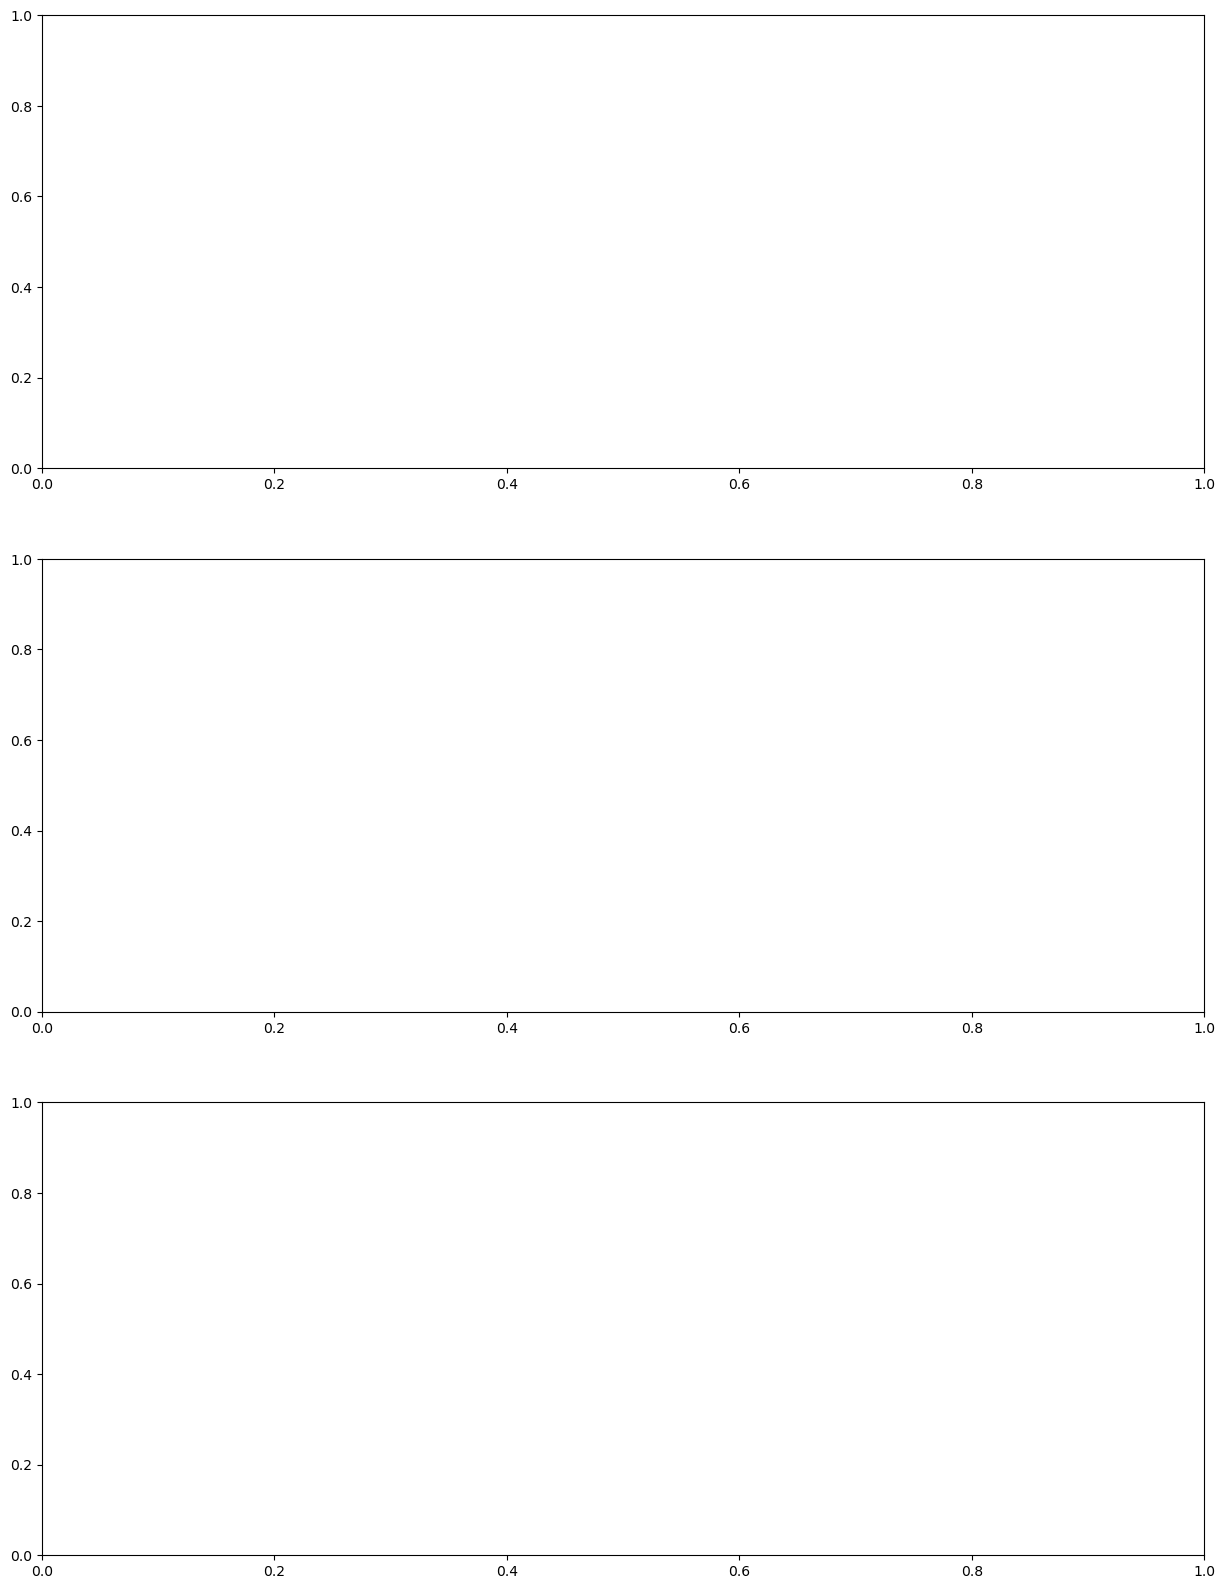

In [64]:
fig,axs=plt.subplots(3,figsize=(15,20))


monthly.plot(ax=axs[0],label="report1")
monthly.tail(7).plot(ax=axs[0],label="report2",color="orange")

# Create a second y-axis to show total monthly hours
y2 = axs[0].twinx()
# #plot the summation of a 7 day window
y2.plot(monthly*30)
y2.plot((monthly*30).tail(7),label="report2",color="orange")
axs[0].legend()




#plot 7 day rolling average
weekly.plot(ax=axs[1],label="report1")
weekly.tail(7).plot(ax=axs[1],label="report2",color="orange")
# Create a second y-axis to show total weekly hours
y2 = axs[1].twinx()
# plot the summation of a 7 day window
y2.plot(weekly*7)
y2.plot((weekly*7).tail(7),label="report2",color="orange")
axs[1].legend()


daily.plot(ax=axs[2],label="report1")
daily.tail(7).plot(ax=axs[2],color='orange',label="report2")
axs[2].legend()

In [32]:
weekly

2022-10-08    0.357143
2022-10-09    0.500000
2022-10-10    0.500000
2022-10-11    0.500000
2022-10-12    0.642857
                ...   
2022-12-26    1.792857
2022-12-27    1.757143
2022-12-28    1.807143
2022-12-29    2.092857
2022-12-30    1.785714
Name: amount, Length: 84, dtype: float64

In [50]:
xticks = pd.date_range(weekly.index[0], weekly.index[-1], freq='W')
ax.set_xticklabels([x.strftime('%d/%m/%Y') for x in xticks])

['09/10/2022',
 '16/10/2022',
 '23/10/2022',
 '30/10/2022',
 '06/11/2022',
 '13/11/2022',
 '20/11/2022',
 '27/11/2022',
 '04/12/2022',
 '11/12/2022',
 '18/12/2022',
 '25/12/2022']

In [ ]:
def compute_series(series):
    #monthly rolling average
    df=series.to_frame()
    monthly"]=series.rolling(30).mean().dropna()
    dfweekly=series.rolling(7).mean().dropna()
    daily=series[series>.5]
    
    return monthly,weekly,daily

In [8]:
monthly["highlited"]=np.nan

In [9]:
monthly

2022-10-31 00:00:00    1.006667
2022-11-01 00:00:00    1.110000
2022-11-02 00:00:00    1.138333
2022-11-03 00:00:00    1.180000
2022-11-04 00:00:00    1.180000
                         ...   
2022-12-27 00:00:00    1.790000
2022-12-28 00:00:00    1.788333
2022-12-29 00:00:00    1.848333
2022-12-30 00:00:00    1.848333
highlited                   NaN
Name: amount, Length: 62, dtype: float64

In [7]:
monthly.loc[monthly.index>="2022-12-26","highlited"]=monthly.loc[monthly.index>="2022-12-26","amount"]

IndexingError: Too many indexers

<AxesSubplot:>

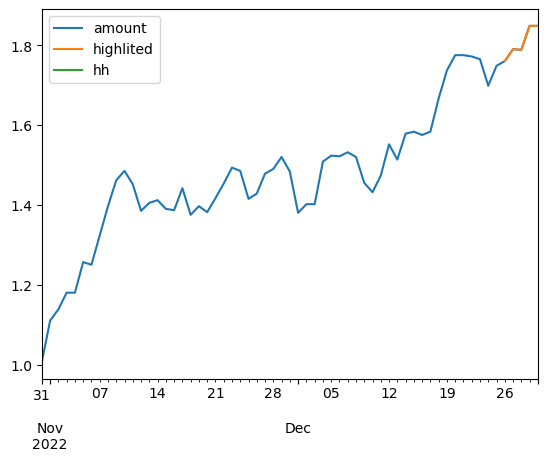

In [102]:
def monthly(series):
    monthly=series.rolling(30).
    

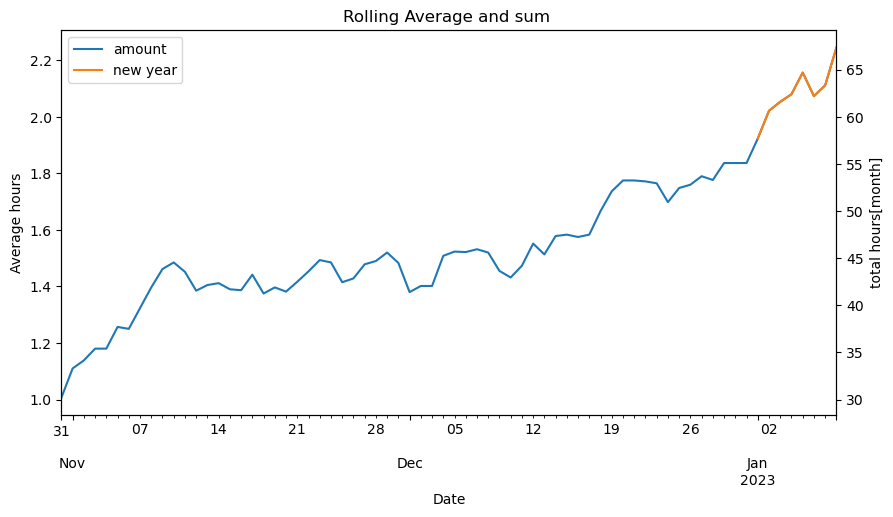

In [63]:
def monthly(series):
    monthly=series.rolling(30).mean().dropna()
    monthly=monthly.to_frame()
    monthly["new year"]=monthly["amount"][monthly.index>="2023-1-1"]
    
    fig,ax=plt.subplots(1,figsize=(10,5))
    monthly.plot(ax=ax)
    plt.xlabel("Date")
    plt.ylabel("Average hours")
    y2 = plt.twinx()
    # #plot the summation of a 7 day window
    y2.plot((monthly*30).values)
    plt.ylabel("total hours[month]")
    plt.title("Rolling Average and sum ")
    
monthly(series)

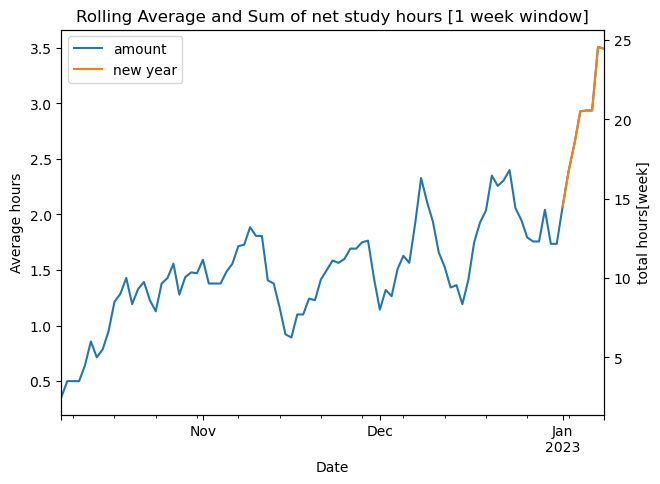

In [73]:
def weekly(series):
    weekly=series.rolling(7).mean().dropna()
    weekly=weekly.to_frame()
    weekly["new year"]=weekly["amount"][weekly.index>="2023-1-1"]
    
    fig,ax=plt.subplots(1,figsize=(7,5))
    weekly.plot(ax=ax)
    plt.xlabel("Date")
    plt.ylabel("Average hours")
    y2 = plt.twinx()
    # #plot the summation of a 7 day window
    y2.plot((weekly*7).values)
    plt.ylabel("total hours[week]")
    plt.title("Rolling Average and Sum of net study hours [1 week window]")
weekly(series)

In [47]:
weekly["2022"][weekly.index>="2023-1-1"]

2023-01-01    2.071429
2023-01-02    2.385714
2023-01-03    2.635714
2023-01-04    2.928571
2023-01-05    2.935714
2023-01-06    2.935714
2023-01-07    3.507143
2023-01-08    3.492857
2023-01-09    2.892857
Name: 2022, dtype: float64

In [45]:
weekly.index>="2023-1-1"

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [12]:
monthly["amount"].values()

TypeError: 'function' object is not subscriptable

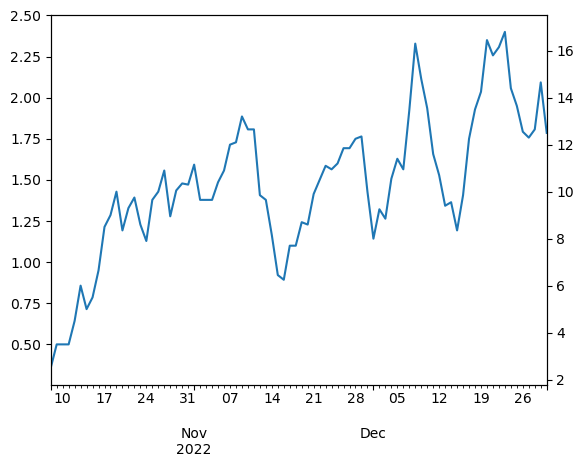

In [22]:
#plot 7 day rolling average
weekly.plot()
# Create a second y-axis to show total weekly hours
y2 = plt.twinx()
# plot the summation of a 7 day window
y2.plot((weekly*7).values)

In [60]:
series.drop(index="2023-01-09",inplace=True)

In [61]:
series.tail()

2023-01-04    4.05
2023-01-05    4.05
2023-01-06    0.00
2023-01-07    4.00
2023-01-08    4.00
Name: amount, dtype: float64

In [86]:
daily=series[series>.0]

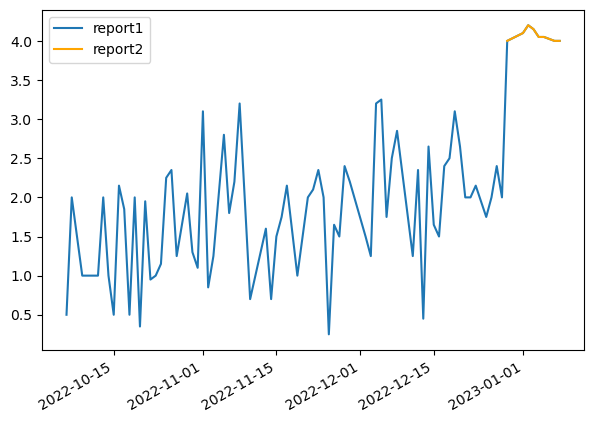

In [87]:
fig,ax=plt.subplots(1,figsize=(7,5))
daily.plot(label="report1",ax=ax)
daily.tail(8).plot(color='orange',label="report2",ax=ax)
plt.legend()